In [271]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
import os 
from tensorflow.keras.applications import VGG16
from PIL import Image
import imageio
import pandas as pd
import random

# Image Resizing

In [382]:
image_folder = "obj_seg_label"

output_image_folder = "resized_labels_urban"

target_size = (256, 256)


for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, target_size)
    cv2.imwrite(os.path.join(output_image_folder, filename), resized_image)
print("Resizing completed!")


Resizing completed!


# Extracting pixels from the images 

In [3]:
def extract_pixel(image_folder):
    images = []
    for filename in os.listdir(image_folder):
          image_path = os.path.join(image_folder, filename)
          image = cv2.imread(image_path)
          image_array = np.array(image)
          images.append(image_array)
    return np.array(images)
          

In [4]:
X_i = extract_pixel("resized_images_aerial")
Y_m = extract_pixel("resized_labels_urban")

In [8]:
y = Y_m

In [10]:
print(X_i.shape)
print(Y_m.shape)

(400, 256, 256, 3)
(400, 256, 256, 3)


# Converting the mask images into only 5 pixeled values

In [392]:
grouped_classes = {
         0: [155,38,182], #'obstacles'
         1:  [14,135,204],# 'water'
         2: [124,252,0], #'nature'
         3:  [255,20,147], #'moving'
         4: [169,169,169] #'landable'
}

for i in range(Y_m.shape[0]):
  reshaped = Y_m[i].reshape((256*256),3)
  for j in range(reshaped.shape[0]):
    distance = np.zeros(5)
    for label, pixel in grouped_classes.items():
        distance[label]=np.square(np.sum(reshaped[j]-grouped_classes[label]))
    reshaped[j]=grouped_classes[np.argmin(distance)]
  Y_m[i]= reshaped.reshape((256,256,3))
  print(f"Done for image{i}")

Done for image0
Done for image1
Done for image2
Done for image3
Done for image4
Done for image5
Done for image6
Done for image7
Done for image8
Done for image9
Done for image10
Done for image11
Done for image12
Done for image13
Done for image14
Done for image15
Done for image16
Done for image17
Done for image18
Done for image19
Done for image20
Done for image21
Done for image22
Done for image23
Done for image24
Done for image25
Done for image26
Done for image27
Done for image28
Done for image29
Done for image30
Done for image31
Done for image32
Done for image33
Done for image34
Done for image35
Done for image36
Done for image37
Done for image38
Done for image39
Done for image40
Done for image41
Done for image42
Done for image43
Done for image44
Done for image45
Done for image46
Done for image47
Done for image48
Done for image49
Done for image50
Done for image51
Done for image52
Done for image53
Done for image54
Done for image55
Done for image56
Done for image57
Done for image58
Done fo

# Loading the numpy arrays only containing the required pixel values

In [2]:
Y = np.load("Y_p.npy")

# Labelizing each pixel in the masked images

In [400]:
grouped_classes = {
         0:[155,38,182], #'obstacles'
         1:[14,135,204],# 'water'
         2:[124,252,0], #'nature'
         3:[255,20,147], #'moving'
         4:[169,169,169] #'landable'
}

Y_labeled = np.zeros((Y.shape[0],256,256),dtype = np.int32)

for i in range(Y.shape[0]):
  reshaped = Y[i].reshape((256*256),3)
  list = np.zeros(256*256,dtype = np.int32)
  
  for j in range(reshaped.shape[0]):
    for label,pixel in grouped_classes.items():
        if (reshaped[j] == pixel).all():
            list[j]=label
            break
  Y_labeled[i]= list.reshape(256,256)
  # Y[i]= reshaped.reshape((256,256))
  print(f"Done for image{i}")

Done for image0
Done for image1
Done for image2
Done for image3
Done for image4
Done for image5
Done for image6
Done for image7
Done for image8
Done for image9
Done for image10
Done for image11
Done for image12
Done for image13
Done for image14
Done for image15
Done for image16
Done for image17
Done for image18
Done for image19
Done for image20
Done for image21
Done for image22
Done for image23
Done for image24
Done for image25
Done for image26
Done for image27
Done for image28
Done for image29
Done for image30
Done for image31
Done for image32
Done for image33
Done for image34
Done for image35
Done for image36
Done for image37
Done for image38
Done for image39
Done for image40
Done for image41
Done for image42
Done for image43
Done for image44
Done for image45
Done for image46
Done for image47
Done for image48
Done for image49
Done for image50
Done for image51
Done for image52
Done for image53
Done for image54
Done for image55
Done for image56
Done for image57
Done for image58
Done fo

# Loading the saved labeled numpy arrays

In [14]:
Y_label = np.load("Y_l.npy")

In [16]:
print(Y_label.shape)

(400, 256, 256)


# One hot encoding the labels

In [19]:
labels = to_categorical(Y_label,5)

In [21]:
labels = np.array(labels, dtype = np.int32)

In [23]:
print(labels.shape)

(400, 256, 256, 5)


# Splitting the Dataset

In [26]:
X_train,x_,Y_train, y_ = train_test_split(X_i,labels,test_size = 0.30, random_state = 1)
X_cv,X_test, Y_cv, Y_test = train_test_split(x_,y_,test_size = 0.50, random_state = 1)


# Normalizing the Dataset

In [29]:
X_train = X_train/255
X_cv=X_cv/255
X_test = X_test/255


In [31]:
import numpy as np

assert not np.any(np.isnan(X_train)), "Images contain NaN values"
assert not np.any(np.isnan(Y_train)), "Masks contain NaN values"
assert np.max(X_train) <= 1.0 and np.min(X_train) >= 0.0, "Images not normalized properly"



In [33]:
Y_train = np.expand_dims(Y_train, axis=-1)
Y_cv = np.expand_dims(Y_cv, axis=-1)
Y_test = np.expand_dims(Y_test, axis=-1)

In [35]:
print("Training set:",np.shape(X_train), np.shape(Y_train))
print("Cross-validation set:", np.shape(X_cv), np.shape(Y_cv))
print("Test set:", np.shape(X_test), np.shape(Y_test))

Training set: (280, 256, 256, 3) (280, 256, 256, 5, 1)
Cross-validation set: (60, 256, 256, 3) (60, 256, 256, 5, 1)
Test set: (60, 256, 256, 3) (60, 256, 256, 5, 1)


# Preparing the Model

In [38]:
def unet(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)

    # Encoder: Pretrained VGG16
    vgg = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)
    skip_connections = [vgg.get_layer(name).output for name in ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv3"]]
    encoder_output = vgg.get_layer("block5_conv3").output

    # Decoder
    x = encoder_output
    for i, skip in enumerate(reversed(skip_connections)):
        x = UpSampling2D((2, 2))(x)
        x = Concatenate()([x, skip])
        x = Conv2D(256 // (2 ** i), (3, 3), activation="relu", padding="same")(x)

    # Output Layer
    outputs = Conv2D(5, (1, 1), activation="softmax")(x)
    return Model(inputs, outputs)

model = unet()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 256, 256, 64)      │           1,792 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 256, 256, 64)      │          36,928 │ block1_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_pool (MaxPooling2D)    │ (None, 128, 128, 64)      │               0 │ block1_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_conv1 (Conv2D)         │ (None, 128, 128, 128)     │          73,856 │ block1_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_conv2 (Conv2D)         │ (None, 128, 128, 128)     │         147,584 │ block2_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 64, 64, 128)       │               0 │ block2_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv1 (Conv2D)         │ (None, 64, 64, 256)       │         295,168 │ block2_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv2 (Conv2D)         │ (None, 64, 64, 256)       │         590,080 │ block3_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_conv3 (Conv2D)         │ (None, 64, 64, 256)       │         590,080 │ block3_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block3_pool (MaxPooling2D)    │ (None, 32, 32, 256)       │               0 │ block3_conv3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv1 (Conv2D)         │ (None, 32, 32, 512)       │       1,180,160 │ block3_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv2 (Conv2D)         │ (None, 32, 32, 512)       │       2,359,808 │ block4_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_conv3 (Conv2D)         │ (None, 32, 32, 512)       │       2,359,808 │ block4_conv2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block4_pool (MaxPooling2D)    │ (None, 16, 16, 512)       │               0 │ block4_conv3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block5_conv1 (Conv2D)         │ (None, 16, 16, 512)       │       2,359,808 │ block4_pool[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block5_conv2 (Conv2D)         │ (None, 16, 16, 512)       │       2,359,808 │ block5_conv1[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 17,848,773 (68.09 MB)

 Trainable params: 17,848,773 (68.09 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:

def dice_loss(y_true, y_pred, smooth=1e-6):
    # Flatten y_true and y_pred
    y_true_f = tf.reshape(y_true, [-1, tf.shape(y_pred)[-1]])
    y_pred_f = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    union = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)

    # Compute Dice Coefficient
    dice = (2. * intersection + smooth) / (union + smooth)

    # Dice loss is 1 - Dice Coefficient
    return 1 - tf.reduce_mean(dice)




In [42]:


def combined_loss(y_true, y_pred):
    scce_loss = tf.keras.losses.CategoricalFocalCrossentropy(alpha=0.25, gamma=2.0)(y_true, y_pred)  # For one-hot labels
    d_loss = dice_loss(y_true, y_pred)
    return scce_loss + d_loss




In [44]:
model.compile(loss=combined_loss ,optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001))


# Freezing encoders

In [171]:
for layer in model.layers[:19]:  # Adjust based on the encoder
    layer.trainable = False

# Training the Model/ Fine Tuning the Model

In [174]:
model.fit(X_train,Y_train,batch_size=4,epochs = 10)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - loss: 0.2750
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - loss: 0.2633
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1598s 23s/step - loss: 0.2580
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - loss: 0.2485
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - loss: 0.2361
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - loss: 0.2356
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 642s 9s/step - loss: 0.2219
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - loss: 0.2397
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - loss: 0.2233
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - loss: 0.2232


# Making Predictions

In [176]:
def make_predictions(X):
   num,height,width = X.shape[0], X.shape[1], X.shape[2]
   yhat = np.zeros((num,height,width),dtype = np.int32)
   for i in range(num):
     y = model.predict(np.expand_dims(X[i],axis = 0))  
     y_reduced = np.squeeze(y)
     for j in range(256):
       for k in range(256):
         yhat[i,j,k]=np.argmax(y_reduced[j,k])
   return yhat
    
    

# Computing Error

In [179]:
def pixel_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = np.prod(y_true.shape)
    return correct / total

# Training Error

In [184]:
y = make_predictions(X_train)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [186]:

y_t = np.squeeze(Y_train,axis = -1)
y_new = np.argmax(y_t,axis =-1)
accuracy = pixel_accuracy(y_new,y)
print(f"Training-error:{1-accuracy}")



Training-error:0.0468794141496931


# Cross Validation Error

In [189]:
y_cv = make_predictions(X_cv)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [191]:


y_t = np.squeeze(Y_cv,axis = -1)
y_new = np.argmax(y_t,axis =-1)
accuracy = pixel_accuracy(y_new,y_cv)
print(f"Cross Validation error:{1-accuracy}")


Cross Validation error:0.09942016601562498


# Test Error

In [194]:
y_test = make_predictions(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [196]:
y_t = np.squeeze(Y_test,axis = -1)
y_new = np.argmax(y_t,axis =-1)
accuracy = pixel_accuracy(y_new,y_cv)
print(f"Test error:{1-accuracy}")

Test error:0.5877886454264323


# Predictions for random 10 examples in the test set

In [199]:
def convert(yh):
  grouped_classes = [
         (155,38,182), #'obstacles'
         (14,135,204),# 'water'
         (124,252,0), #'nature'
         (255,20,147), #'moving'
         (169,169,169)] #'landable'
  image = np.zeros((256,256,3),dtype = np.int32)
  for class_id, color in enumerate(grouped_classes):
    image[yh == class_id] = color
  return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


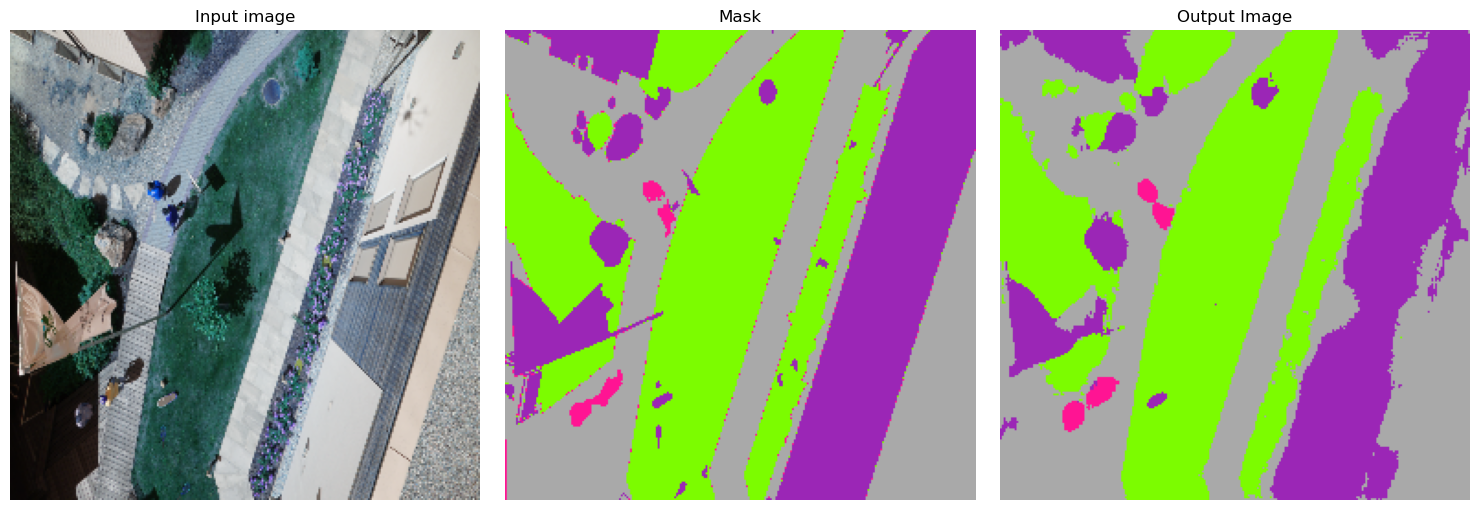

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


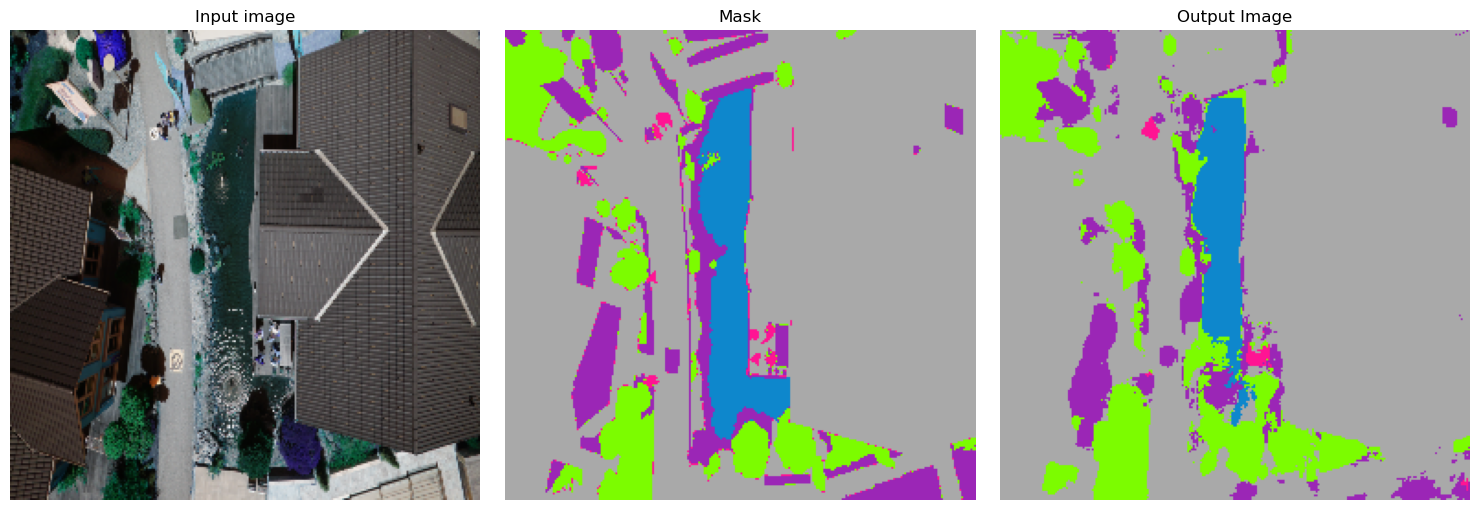

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


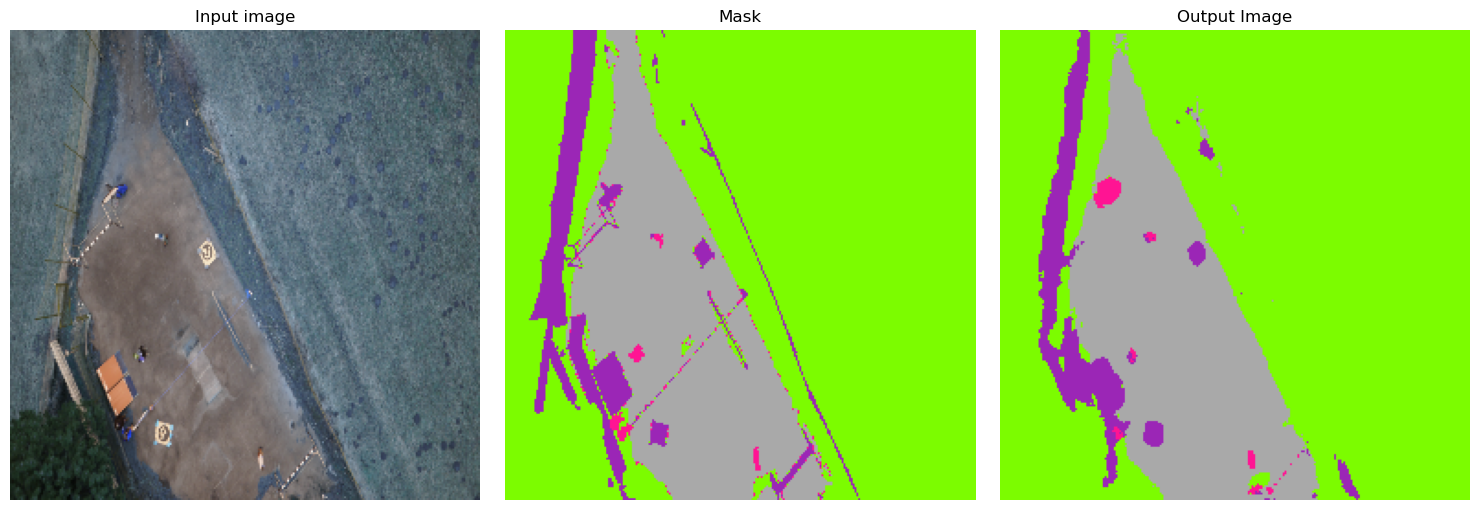

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


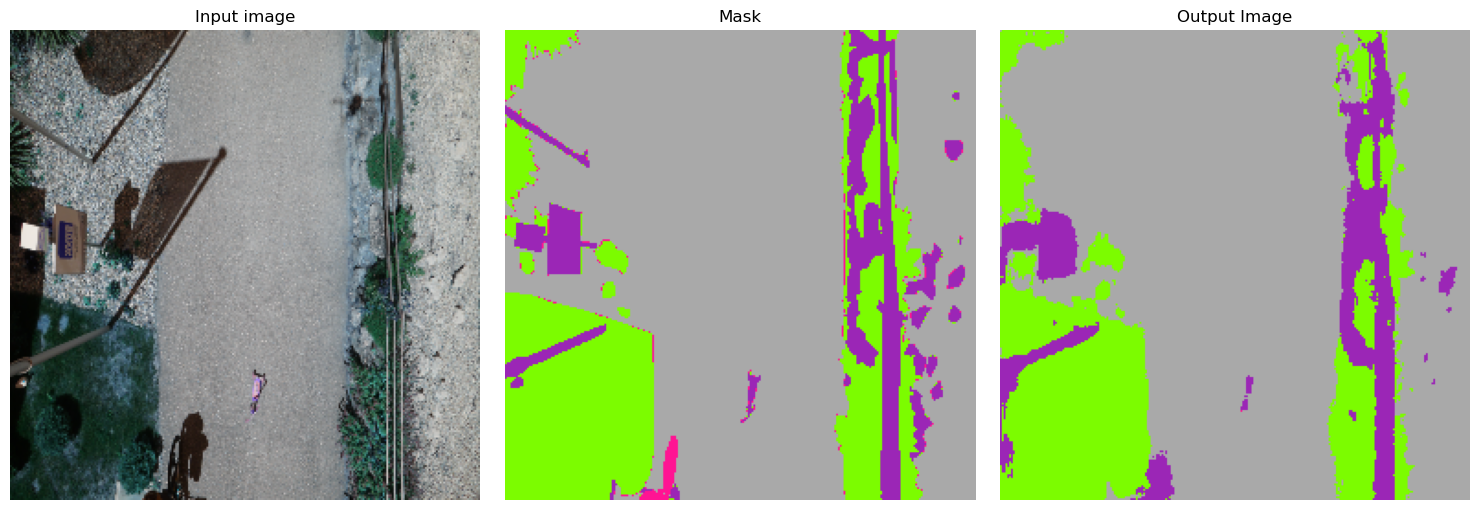

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


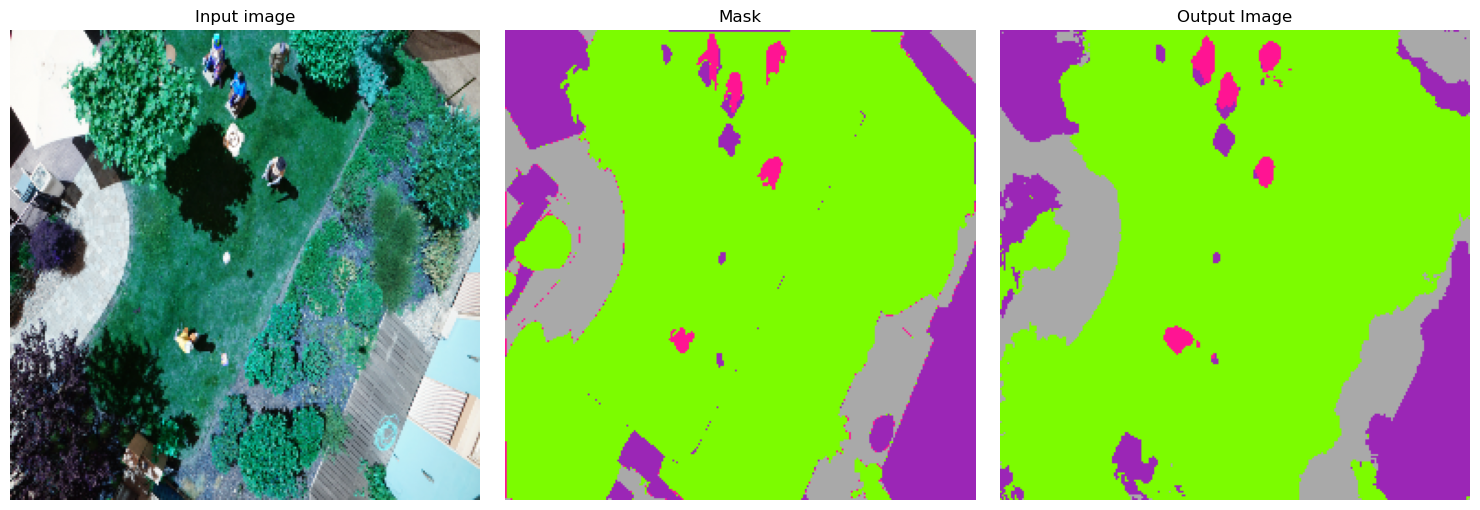

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


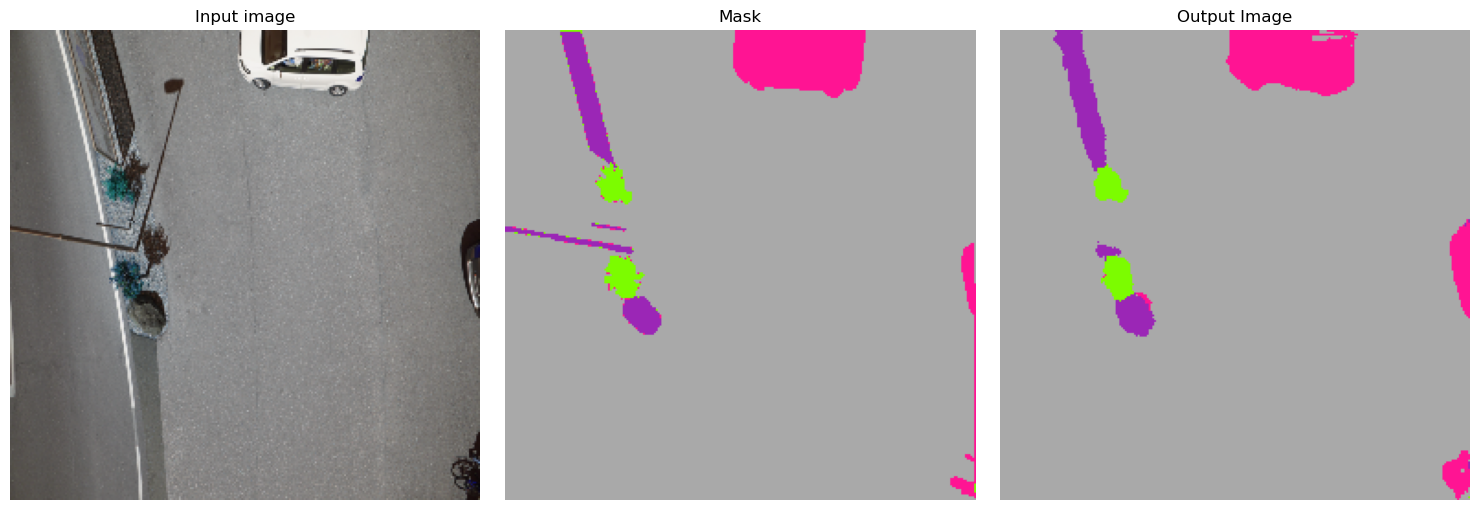

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


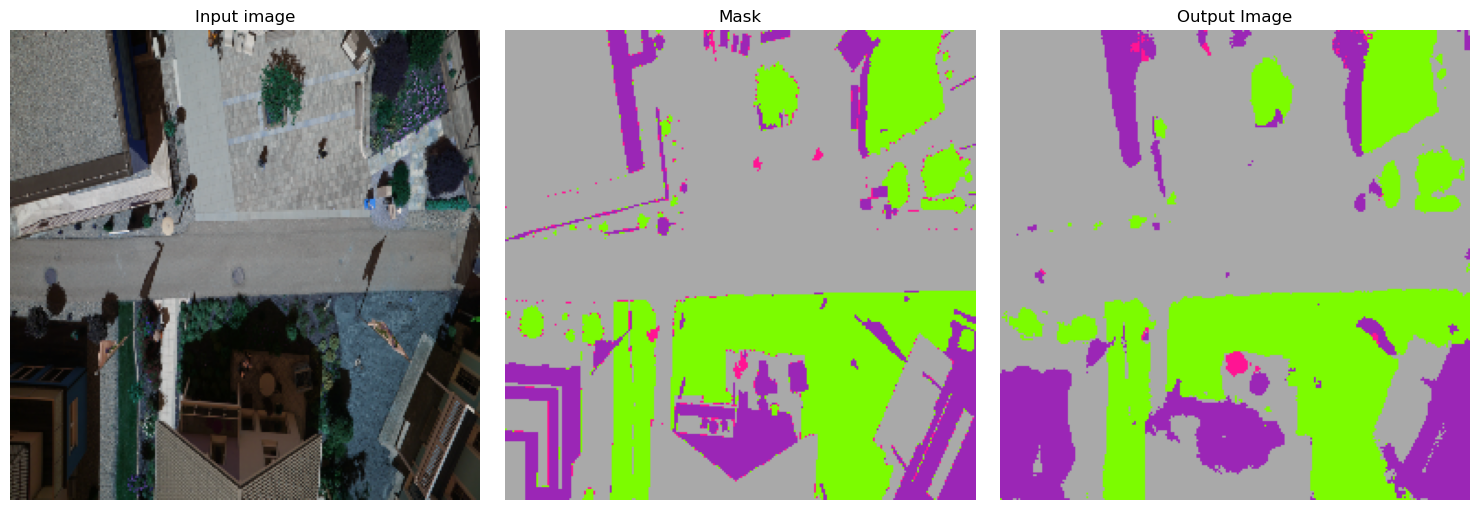

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


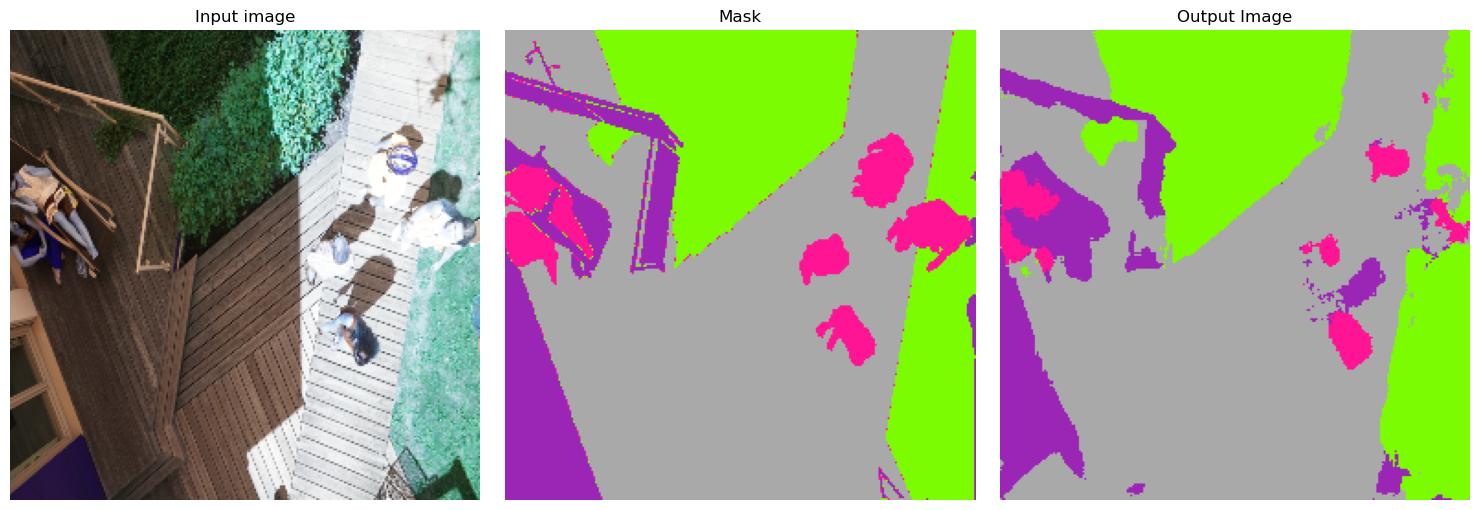

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


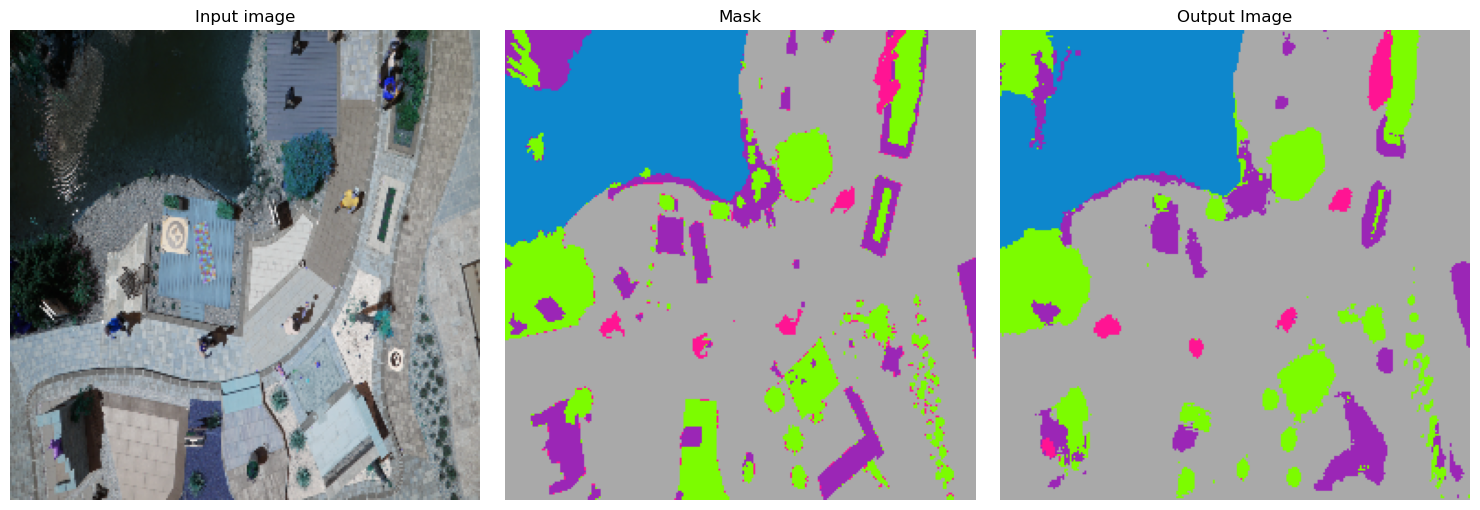

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


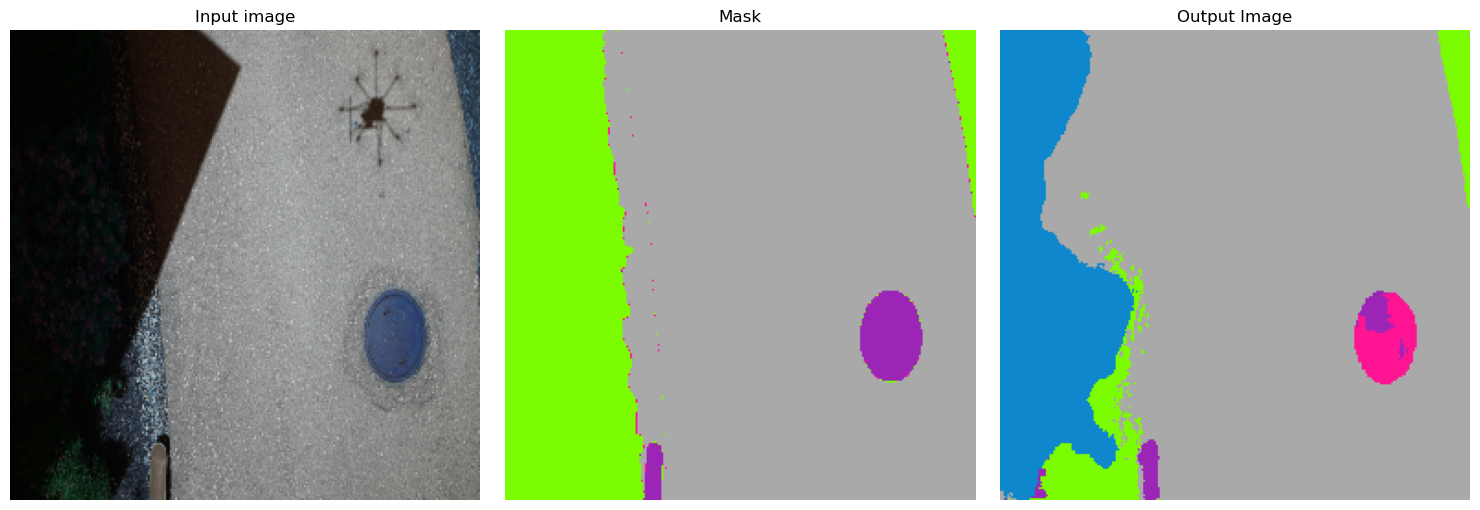

In [277]:

#steps to be followed for prediction
for i in range(10):
    num = random.randint(0,X_test.shape[0])
    y = model.predict(np.expand_dims(X_test[num],axis = 0))
    y_reduced = np.squeeze(y)
    yhat = np.zeros((256,256))
    for i in range(256):
      for j in range(256):
        yhat[i,j]=np.argmax(y_reduced[i,j])
    y_h= np.array(yhat,dtype = np.int32)
    
    infer = convert(y_h)#for inference/output
    
    reduc = np.squeeze(Y_test[num],axis = -1)#for masked images
    r1 = np.argmax(reduc, axis = -1)
    test = convert(r1)

    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1) 
    plt.imshow(X_test[num])
    plt.title("Input image")
    plt.axis('off')  

    plt.subplot(1, 3, 2)  
    plt.imshow(test)
    plt.title("Mask")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)  
    plt.imshow(infer)
    plt.title("Output Image")
    plt.axis('off')
    plt.tight_layout()  
    plt.show()
